## Course: INF 2178 - Experimental Design For Data Science
## Name: Saad Umar
## Assignmnet 4
## Instructor: Shion Guha
## Program: Master of Information
## University of Toronto

In [33]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%pip install pingouin
import pingouin as pg
from scipy.stats import levene
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestPower
from statsmodels.stats.power import TTestIndPower
import numpy as np

In [35]:
df = pd.read_csv("/drive/MyDrive/INF2178/Assignment4/INF2178_A4_data.csv")
df

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [36]:
# Drop unnecessary columns
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [37]:
df.info()
print()
print("Unique Observations:")
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   MRI ID      294 non-null    object 
 2   Group       294 non-null    object 
 3   Visit       294 non-null    int64  
 4   MR Delay    294 non-null    int64  
 5   M/F         294 non-null    object 
 6   Hand        294 non-null    object 
 7   Age         294 non-null    int64  
 8   EDUC        294 non-null    int64  
 9   SES         279 non-null    float64
 10  MMSE        293 non-null    float64
 11  CDR         294 non-null    float64
 12  eTIV        294 non-null    int64  
 13  nWBV        294 non-null    float64
 14  ASF         294 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 34.6+ KB

Unique Observations:


Subject ID    150
MRI ID        294
Group           3
Visit           2
MR Delay      129
M/F             2
Hand            1
Age            38
EDUC           12
SES             5
MMSE           16
CDR             4
eTIV          238
nWBV          129
ASF           229
dtype: int64

In [38]:
df["Visit"] = df["Visit"].astype(str)
df["eTIV"] = df["eTIV"].astype(float)

## EDA

In [39]:
df.describe()

,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


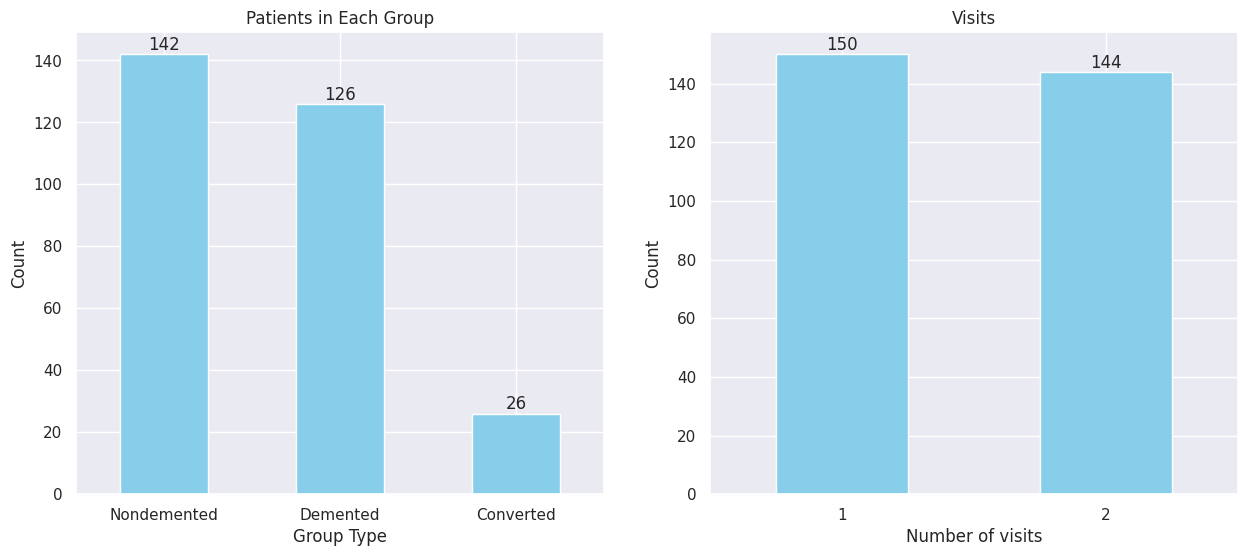

In [40]:
# Setting the size of the figure
plt.figure(figsize = (15,6))

# Subplot 1: Bar chart for 'Group' column
plt.subplot(1, 2, 1)

# Get the counts of unique values in the Income Group column
group_count = df['Group'].value_counts()

# Plot a bar chart with green color
group_count.plot(kind='bar', color='skyblue')

# Setting titles and labels
plt.title('Patients in Each Group')
plt.xlabel('Group Type')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')

# Add text labels on top of each bar to display the count
for index, value in enumerate(group_count):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Subplot 2
plt.subplot(1, 2, 2)
visit = df['Visit'].value_counts()

# Plot a bar chart with green color
visit.plot(kind='bar', color='skyblue')

# Setting titles and labels
plt.title('Visits')
plt.xlabel('Number of visits')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
# Add text labels on top of each bar to display the count
for index, value in enumerate(visit):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')


plt.show()

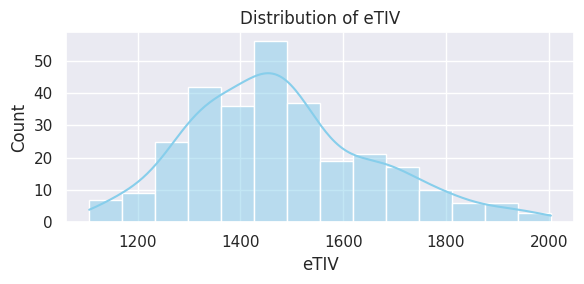

In [41]:
# Setting the size of the figure
plt.figure(figsize = (6,3))

# use histograms for numerical variables
sns.histplot(df['eTIV'], kde=True, color='skyblue')

plt.title("Distribution of eTIV")
# adjusting layout and display the plots
plt.tight_layout()
plt.show()

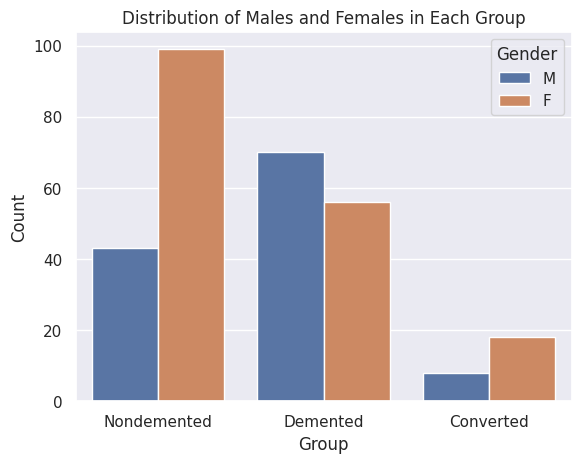

In [42]:
# Bar chart to see the distribution of genders in each group.
fig, ax = plt.subplots()
sns.countplot(x='Group', hue='M/F', data=df, ax=ax)

plt.title('Distribution of Males and Females in Each Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

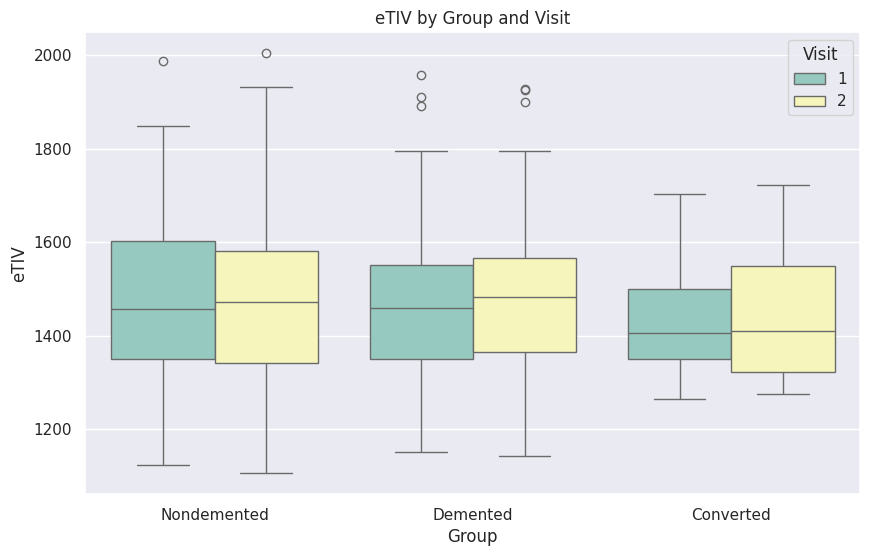

In [43]:
# Boxplot for MMSE between each Group AND each Visit
plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="eTIV", hue="Visit", data=df, palette="Set3")
plt.xlabel("Group")
plt.ylabel("eTIV")
plt.title("eTIV by Group and Visit")
plt.show()

In [44]:
print("Mean and standard deviation of MMSE grouped by visit and gender")
df.groupby(['Visit', 'M/F'])['MMSE'].agg(['mean', 'std']).round(2)

Mean and standard deviation of MMSE grouped by visit and gender


mean   std
Visit M/F             
1     F    28.10  2.59
      M    26.79  3.30
2     F    27.31  3.41
      M    26.42  4.30

In [45]:
print("Mean and standard deviation of eTIV grouped by visit and gender")
df.groupby(['Visit', 'Group'])['eTIV'].agg(['mean', 'std']).round(2)

Mean and standard deviation of eTIV grouped by visit and gender


mean     std
Visit Group                       
1     Converted    1438.29  132.95
      Demented     1475.94  173.62
      Nondemented  1480.11  183.75
2     Converted    1446.25  150.29
      Demented     1491.55  177.26
      Nondemented  1482.69  186.32

## Mixed Effects Anova 1

Reseearch Question 1: Does the 'Group' variable have a significant effect on eTIV across different visits?

In [46]:
mixed_anova1 = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(mixed_anova1)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



(For reference): In the above code:

1. dv='eTIV': This specifies the dependent variable for the ANOVA.
2. within='Visit': This specifies the within-subject factor, meaning the variable that changes within subjects over the different levels of measurement. In this case, 'Visit' represents different time points or visits at which measurements were taken.
3. between='Group': This specifies the between-subject factor, meaning the variable that represents different groups or categories that subjects belong to.
4. subject='Subject ID': This specifies the subject identifier variable, indicating which rows of data belong to the same subject. 'Subject ID' is a unique identifier for each subject.

<ipython-input-47-4ab04e183694>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True, markers=['o', 's','x'],


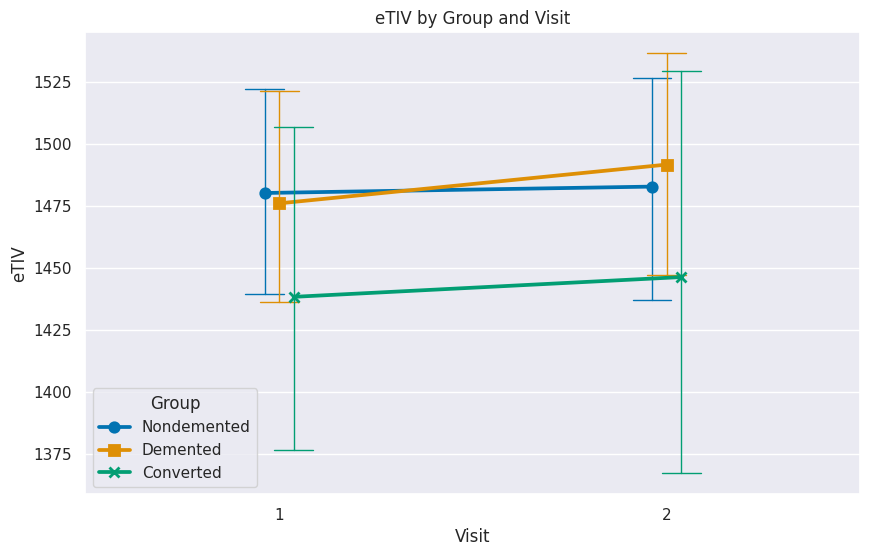

In [47]:
plt.figure(figsize=(10, 6))
sns.set()
sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True, markers=['o', 's','x'],
	      capsize=.1, errwidth=1, palette='colorblind')
plt.title('eTIV by Group and Visit')
plt.xlabel('Visit')
plt.ylabel('eTIV')
plt.legend(title='Group')
plt.show()

In [48]:
# Assumption 1 : Normality of Residuals
shapiro_test1 = pg.normality(data=df, dv='eTIV', group='Group')
# Apply formatting to the columns
shapiro_test1['pval'] = shapiro_test1['pval'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
shapiro_test1['W'] = shapiro_test1['W'].round(3)
shapiro_test1

,W,pval,normal
Group,,,
Nondemented,0.973,0.006,False
Demented,0.968,0.005,False
Converted,0.918,0.041,False


In [63]:
# Assumption
# Check assumption 1 on sphericity
pg.sphericity(data=df, dv="eTIV", within="Visit", subject="Subject ID")[-1]

1.0

In [49]:
# Assumption 2: Homogenity of Variance
print(pg.homoscedasticity(df[df['Visit'] == "1"], dv="eTIV", group="Group"))
print(pg.homoscedasticity(df[df['Visit'] == "2"], dv="eTIV", group="Group"))

               W      pval  equal_var
levene  0.942689  0.391921       True
               W      pval  equal_var
levene  0.405672  0.667304       True


In [50]:
# Posthoc test
posthoc1 = pg.pairwise_ttests(dv='eTIV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
# Apply formatting to the columns
posthoc1['p-unc'] = posthoc1['p-unc'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
posthoc1

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,Visit,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,-,1,2,True,True,-3.040838,143.000000,two-sided,0.003,7.532,-0.049472
1,Group,-,Converted,Demented,False,True,-0.897261,17.630299,two-sided,0.382,0.423,-0.248616
2,Group,-,Converted,Nondemented,False,True,-0.795766,17.491002,two-sided,0.437,0.393,-0.210159
3,Group,-,Demented,Nondemented,False,True,0.158587,129.302810,two-sided,0.874,0.189,0.027415
4,Visit * Group,1,Converted,Demented,False,True,-0.862648,18.004463,two-sided,0.400,0.413,-0.234972
5,Visit * Group,1,Converted,Nondemented,False,True,-0.844855,17.676169,two-sided,0.409,0.406,-0.221112
6,Visit * Group,1,Demented,Nondemented,False,True,0.033688,129.046789,two-sided,0.973,0.187,0.005828
7,Visit * Group,2,Converted,Demented,False,True,-0.926786,17.492335,two-sided,0.367,0.432,-0.258493
8,Visit * Group,2,Converted,Nondemented,False,True,-0.747158,17.368200,two-sided,0.465,0.382,-0.198543
9,Visit * Group,2,Demented,Nondemented,False,True,0.279884,129.320346,two-sided,0.780,0.193,0.048382


## Mixed Effects Anova 2

Research Question 2: Is there a significant difference in eTIV between males and females across different visits?

In [51]:
mixed_anova2 = pg.mixed_anova(dv='eTIV', within='Visit', between='M/F', subject='Subject ID', data=df)
# Apply formatting to the columns
mixed_anova2['p-unc'] = mixed_anova2['p-unc'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
pg.print_table(mixed_anova2)


ANOVA SUMMARY

Source                SS    DF1    DF2           MS       F  p-unc      np2      eps
-----------  -----------  -----  -----  -----------  ------  -------  -----  -------
M/F          3023632.352      1    142  3023632.352  72.906  < 0.001  0.339  nan
Visit           5573.920      1    142     5573.920   9.208  0.003    0.061    1.000
Interaction      238.477      1    142      238.477   0.394  0.531    0.003  nan



<ipython-input-52-fe43d4444933>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='eTIV', hue='M/F', dodge=True, markers=['o', 'x'],


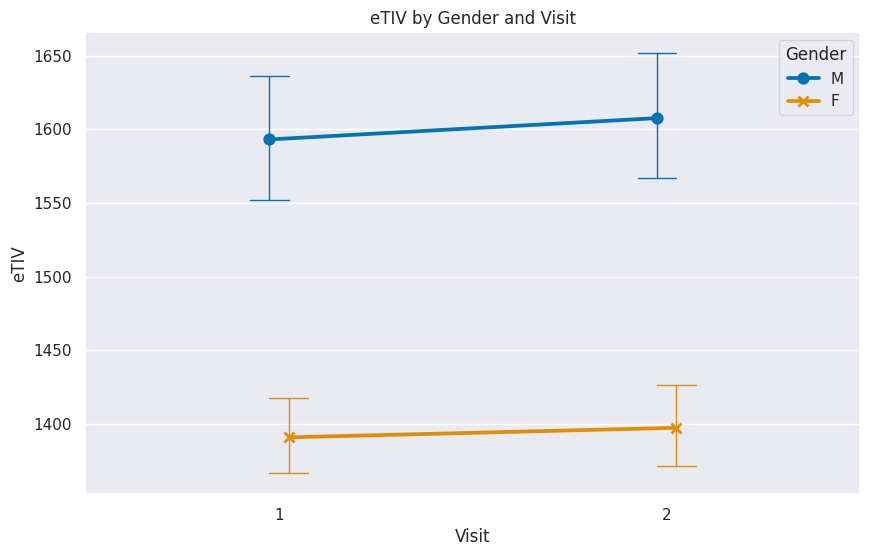

In [52]:
plt.figure(figsize=(10, 6))
sns.set()
sns.pointplot(data=df, x='Visit', y='eTIV', hue='M/F', dodge=True, markers=['o', 'x'],
	      capsize=.1, errwidth=1, palette='colorblind')
plt.title('eTIV by Gender and Visit')
plt.xlabel('Visit')
plt.ylabel('eTIV')
plt.legend(title='Gender')
plt.show()

In [53]:
# Assumption 1 : Normality of Residuals
shapiro_test2 = pg.normality(data=df, dv='eTIV', group='M/F')
# Apply formatting to the columns
shapiro_test2['pval'] = shapiro_test2['pval'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
shapiro_test2['W'] = shapiro_test2['W'].round(3)
shapiro_test2

,W,pval,normal
M/F,,,
M,0.979,0.053,True
F,0.987,0.125,True


In [ ]:
# Assumption
# Check assumption on sphericity
pg.sphericity(data=df, dv="eTIV", within="Visit", subject="Subject ID")[-1]

In [54]:
# Assumption 2: Homogenity of Variance
levene3 = pg.homoscedasticity(df[df['Visit'] == "1"], dv="eTIV", group="M/F")
levene4 = pg.homoscedasticity(df[df['Visit'] == "2"], dv="eTIV", group="M/F")

# Apply formatting to the columns
levene3['pval'] = levene3['pval'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
levene3['W'] = levene3['W'].round(3)

levene4['pval'] = levene4['pval'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
levene4['W'] = levene4['W'].round(3)
levene3, levene4

(             W   pval  equal_var
 levene  10.368  0.002      False,
             W   pval  equal_var
 levene  6.765  0.010      False)

In [55]:
# Posthoc test for research Question 2
posthoc2 = pg.pairwise_ttests(dv='eTIV', within='Visit', between='M/F',
                              subject='Subject ID', data=df)
# Apply formatting to the columns
posthoc2['p-unc'] = posthoc2['p-unc'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
posthoc2

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,Visit,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Visit,-,1,2,True,True,-3.040838,143.000000,two-sided,0.003,7.532,-0.049472
1,M/F,-,F,M,False,True,-8.096701,100.490719,two-sided,< 0.001,2.529e+10,-1.439212
2,Visit * M/F,1,F,M,False,True,-8.025775,99.653316,two-sided,< 0.001,1.728e+10,-1.429301
3,Visit * M/F,2,F,M,False,True,-8.052794,101.407543,two-sided,< 0.001,1.997e+10,-1.428470


## Power Analysis

Given that:

power = 0.91, alpha = 0.05, effect size = 0.7

In [56]:
# Calculate Sample size
power_val = TTestIndPower()
effect_size = 0.7
alpha = 0.05
power = 0.91
sample_size = power_val.solve_power(effect_size=effect_size, alpha=alpha, power=power)
print("Appropriate Sample Size: ", round(sample_size,2))

Appropriate Sample Size:  45.45


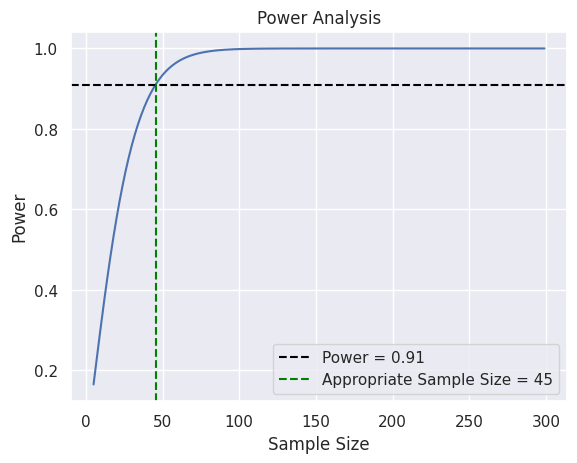

In [62]:
# Power Curve
sample_sizes = range(5, 300)
powers = []
for n in sample_sizes:
    powers.append(power_val.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha))

plt.plot(sample_sizes, powers)
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power Analysis')
plt.axhline(y=power, color='black', linestyle='--', label=f'Power = {power}')
plt.axvline(x=sample_size, color='green', linestyle='--', label=f'Appropriate Sample Size = {sample_size:.0f}')
plt.legend()
plt.show()

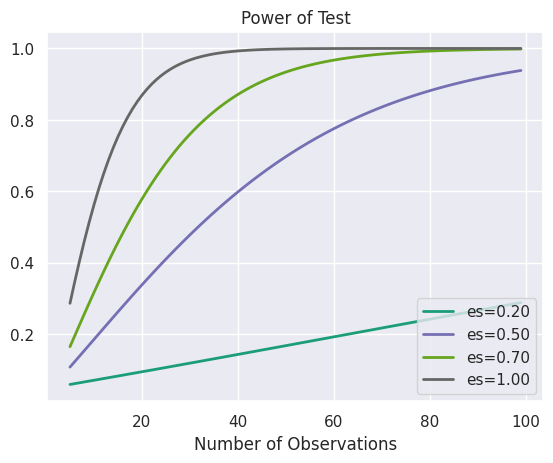

In [61]:
# power analysis different effect sizes
effect_sizes = np.array([0.2, 0.5, 0.7,1.0])
sample_sizes = np.array(range(5, 100))

obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()